## Library And Datasets

In [1]:
# import the library
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# read the datasets
book_data = pd.read_csv('book.csv')
book_data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## Basic EDA 

In [3]:
# dimenssion of the data
book_data.shape

(2000, 11)

In [4]:
# information and types of data
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
ChildBks     2000 non-null int64
YouthBks     2000 non-null int64
CookBks      2000 non-null int64
DoItYBks     2000 non-null int64
RefBks       2000 non-null int64
ArtBks       2000 non-null int64
GeogBks      2000 non-null int64
ItalCook     2000 non-null int64
ItalAtlas    2000 non-null int64
ItalArt      2000 non-null int64
Florence     2000 non-null int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
# statistical description
book_data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# count the total values within all the columns
count_children_books = book_data['ChildBks'].value_counts().sort_values(ascending = False)
count_youth_books = book_data['YouthBks'].value_counts().sort_values(ascending = False)
count_cook_books = book_data['CookBks'].value_counts().sort_values(ascending = False)
count_dolt_books = book_data['DoItYBks'].value_counts().sort_values(ascending = False)
count_ref_books = book_data['RefBks'].value_counts().sort_values(ascending = False)
count_geo_books = book_data['GeogBks'].value_counts().sort_values(ascending = False)
count_icook_books = book_data['ItalCook'].value_counts().sort_values(ascending = False)
count_iatlas_books = book_data['ItalAtlas'].value_counts().sort_values(ascending = False)
count_iart_books = book_data['ItalArt'].value_counts().sort_values(ascending = False)
count_flore_books = book_data['Florence'].value_counts().sort_values(ascending = False)
print('Total counts of (0) and (1) for various books:\n\n', count_children_books, '\n\n', count_youth_books, '\n\n', count_cook_books, 
      '\n\n', count_dolt_books, '\n\n', count_ref_books, '\n\n', count_geo_books, '\n\n', count_icook_books, 
      '\n\n', count_iatlas_books, '\n\n', count_iart_books, '\n\n', count_flore_books)

Total counts of (0) and (1) for various books:

 0    1154
1     846
Name: ChildBks, dtype: int64 

 0    1505
1     495
Name: YouthBks, dtype: int64 

 0    1138
1     862
Name: CookBks, dtype: int64 

 0    1436
1     564
Name: DoItYBks, dtype: int64 

 0    1571
1     429
Name: RefBks, dtype: int64 

 0    1448
1     552
Name: GeogBks, dtype: int64 

 0    1773
1     227
Name: ItalCook, dtype: int64 

 0    1926
1      74
Name: ItalAtlas, dtype: int64 

 0    1903
1      97
Name: ItalArt, dtype: int64 

 0    1783
1     217
Name: Florence, dtype: int64


## Visualizations

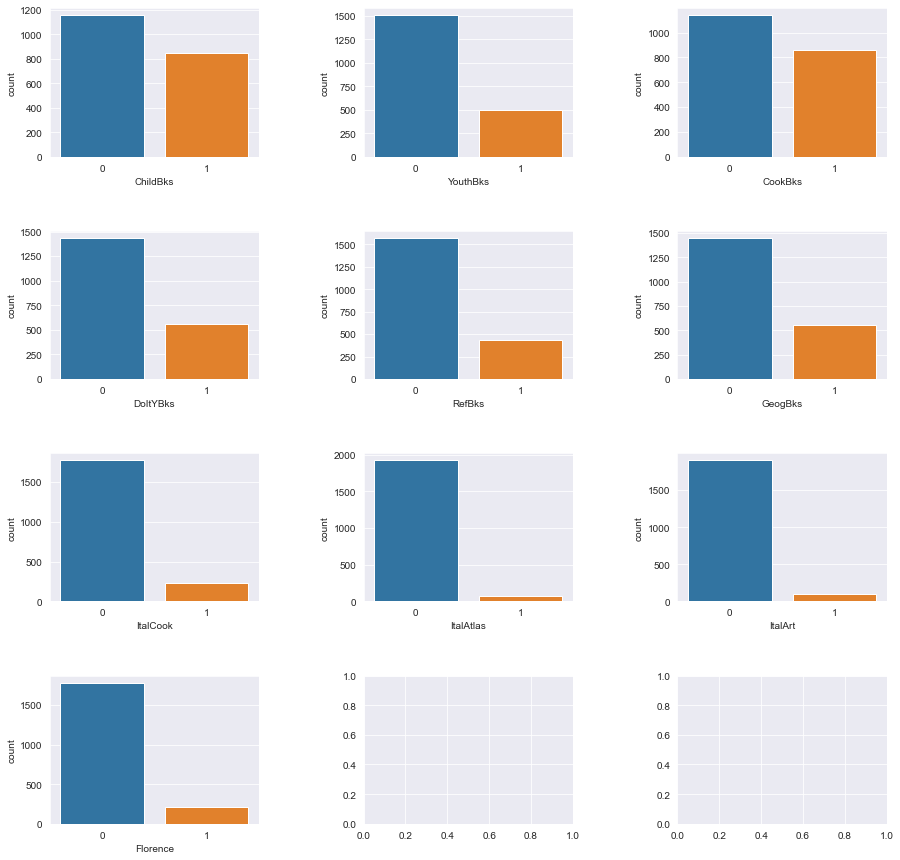

In [7]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

sns.countplot(book_data['ChildBks'], ax = ax[0, 0])
sns.countplot(book_data['YouthBks'], ax = ax[0, 1])
sns.countplot(book_data['CookBks'], ax = ax[0, 2])
sns.countplot(book_data['DoItYBks'], ax = ax[1, 0])
sns.countplot(book_data['RefBks'], ax = ax[1, 1])
sns.countplot(book_data['GeogBks'], ax = ax[1, 2])
sns.countplot(book_data['ItalCook'], ax = ax[2, 0])
sns.countplot(book_data['ItalAtlas'], ax = ax[2, 1])
sns.countplot(book_data['ItalArt'], ax = ax[2, 2])
sns.countplot(book_data['Florence'], ax = ax[3, 0])

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

## Analysis Part (Association)

#### A) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
#### B) Change the minimum length in apriori algorithm
#### C) Visulize the obtained rules using different plots 

1) Combination 1:

        min support = 20 %
        max_len = 1
2) Combination 2:

        min support = 20 %
        max_len = 2
3) Combination 3:

        min support = 20 %
        max_len = 3
4) Combination 4:

        min support = 10 %
        max_len = 1
5) Combination 5:

        min support = 10 %
        max_len = 2
6) Combination 6:

        min support = 10 %
        max_len = 3

##### Combination 1

In [8]:
# apriori algorithm
frequent_bookSets_1 = apriori(book_data, min_support = 0.2, use_colnames=True, max_len = 1)
frequent_bookSets_1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)


In [9]:
# association rule criteria
rule_1 = association_rules(frequent_bookSets_1, metric='lift', min_threshold = 0.8)
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


- With this combination, no association rule is worked
- Max support 43% for Cook book only

##### Combination 2

In [10]:
# apriori algorithm
frequent_bookSets_2 = apriori(book_data, min_support = 0.2, use_colnames=True, max_len = 2)
frequent_bookSets_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [11]:
# association rule criteria
rule_2 = association_rules(frequent_bookSets_2, metric='lift', min_threshold = 0.8)
rule_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


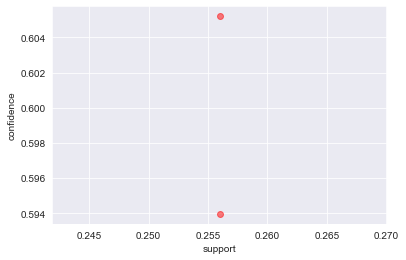

In [12]:
# support v/s confidence
support = rule_2['support']
confidence = rule_2['confidence']

plt.scatter(support, confidence, c = 'r', alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence') 

plt.show()

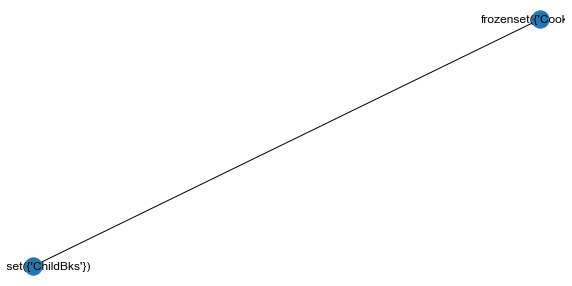

In [13]:
# graph visualization with node form
fig, ax = plt.subplots(figsize=(10,5))
GA = nx.from_pandas_edgelist(rule_2 , source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels = True)
plt.show()

- With this combination, CookBks and ChildBks are depend on each other with same lift value 1.40

##### Combination 3

In [14]:
# apriori algorithm
frequent_bookSets_3 = apriori(book_data, min_support = 0.2, use_colnames=True, max_len = 3)
frequent_bookSets_3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [15]:
# association rule criteria
rule_3 = association_rules(frequent_bookSets_3, metric='confidence', min_threshold = 0.8)
rule_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


- With this combination, no association rule is work

##### Combination 4

In [16]:
# apriori algorithm
frequent_bookSets_4 = apriori(book_data, min_support = 0.1, use_colnames=True, max_len = 1)
frequent_bookSets_4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)


In [17]:
# association rule criteria
rule_4 = association_rules(frequent_bookSets_4, metric='lift', min_threshold = 0.8)
rule_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


- With this combination, no association rule is work

##### Combination 5

In [18]:
# apriori algorithm
frequent_bookSets_5 = apriori(book_data, min_support = 0.1, use_colnames=True, max_len = 2)
frequent_bookSets_5

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [19]:
# association rule criteria
rule_5 = association_rules(frequent_bookSets_5, metric='lift', min_threshold = 0.8)

# sorting the values by lift
rule_5.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
39,(GeogBks),(ArtBks),0.2760,0.2410,0.1275,0.461957,1.916832,0.060984,1.410667
38,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
37,(GeogBks),(RefBks),0.2760,0.2145,0.1105,0.400362,1.866491,0.051298,1.309958
36,(RefBks),(GeogBks),0.2145,0.2760,0.1105,0.515152,1.866491,0.051298,1.493250
33,(ArtBks),(DoItYBks),0.2410,0.2820,0.1235,0.512448,1.817192,0.055538,1.472664
32,(DoItYBks),(ArtBks),0.2820,0.2410,0.1235,0.437943,1.817192,0.055538,1.350397
19,(GeogBks),(YouthBks),0.2760,0.2475,0.1205,0.436594,1.764017,0.052190,1.335627
18,(YouthBks),(GeogBks),0.2475,0.2760,0.1205,0.486869,1.764017,0.052190,1.410945


In [20]:
# add condition: lift should be greater than 1 and confidence should be greater than 0.7
rule5 = rule_5[(rule_5['lift'] >= 1) & (rule_5['confidence'] >= 0.7)].sort_values('lift', ascending=False)
rule5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
10,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
22,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556


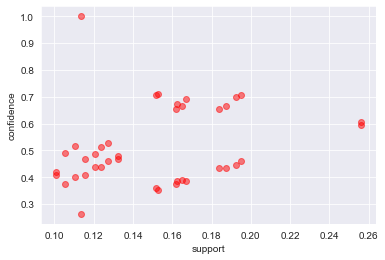

In [21]:
# support v/s confidence
support = rule_5['support']
confidence = rule_5['confidence']

plt.scatter(support, confidence, c = 'r', alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence') 

plt.show()

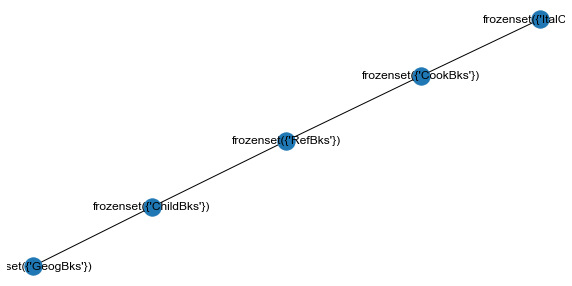

In [22]:
# graph visualization with node form
fig, ax = plt.subplots(figsize=(10,5))
GA = nx.from_pandas_edgelist(rule5 , source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels = True)
plt.show()

- With this combination by applying condition, CookBks is highly dependent on ItalCook because of following reason 
- Support (0.1135) ............. confidence (1.0000) ............ lift (2.3201) .............. conviction (infinity)
- support value is significantly average but confidence value is high with lift value is the most significant than others books and conviction value tends to infinity
- Apart from that, others books also shows association rule but the (CookBks) -> (ItalCook) show a strong one

##### Combination 6

In [23]:
# apriori algorithm
frequent_bookSets_6 = apriori(book_data, min_support = 0.1, use_colnames=True, max_len = 3)
frequent_bookSets_6

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [24]:
# association rule criteria
rule_6 = association_rules(frequent_bookSets_6, metric='lift', min_threshold = 0.8)
rule_6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [25]:
# sorting the values by lift
rule_6.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [26]:
# add condition: lift should be greater than 1 and confidence should be greater than 0.7
rule6 = rule_6[(rule_6['lift'] >= 1) & (rule_6['confidence'] >= 0.7)].sort_values('lift', ascending=False)
top_3 = rule6.head(3) # for analysing the node structure, we have select first 3 records
rule6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
82,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
88,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
53,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
76,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
94,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
40,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
54,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
70,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446
48,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158


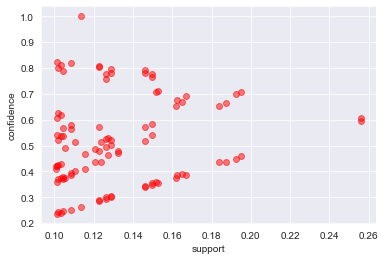

In [27]:
# support v/s confidence
support = rule_6['support']
confidence = rule_6['confidence']

plt.scatter(support, confidence, c = 'r', alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence') 

plt.show()

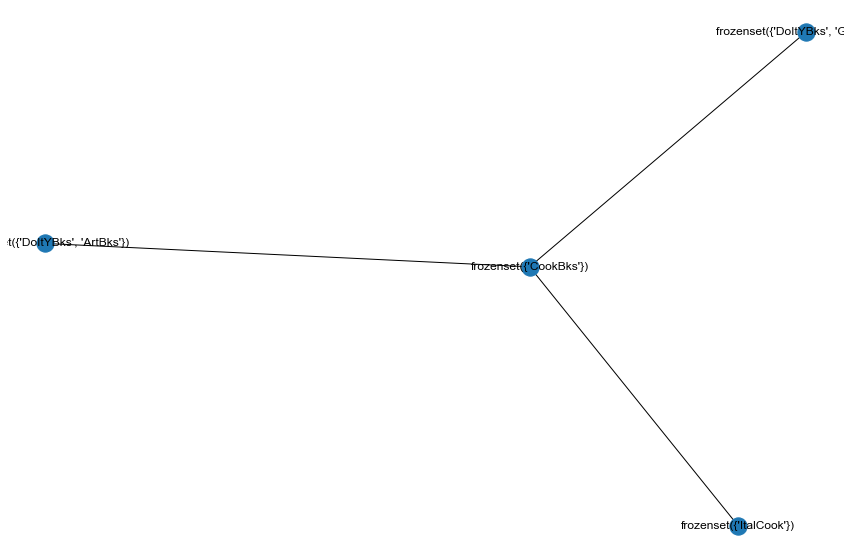

In [28]:
# graph visualization with node form
fig, ax = plt.subplots(figsize=(15,10))
GA = nx.from_pandas_edgelist(top_3 , source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels = True)
plt.show()

- With this combination by applying condition

1) CookBks is highly dependent on ItalCook because of following reason 
- Support (0.1135) ............. confidence (1.0000) ............ lift (2.3201) .............. conviction (infinity)
- support value is significantly average but confidence value is high with lift value is the most significant than others books and conviction value tends to infinity
- Apart from that, others books also shows association rule but the (CookBks) -> (ItalCook) show a strong one

2) Then comes to (CookBks) is depends on (ArtBks, DoItYBks) as well as (GeogBks, DoItYBks).
- This means that if the people read arts and dolt books (ArtBks, DoItYBks) then they also loves to read cooking book (Cookbks) and so on